# Initialize

## Load Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Define functions

In [2]:
def Coinflip(p):
    s = np.random.binomial(1, p, 1)
    return s[0]

In [6]:
def BayesianAnalysis(s, B, prior):
    # We assume a binomial distribution for the coin toss result
    # Calculate the posterior distribution using Bayes theorem for all possible outcomes (B)
    posterior = B**s * (1-B)**(1-s) * prior
    # Return the normalized posterior distribution
    return posterior / np.sum(posterior)

# Parameter defintion

In [4]:
p = 0.5

## Ergebnisvektor

In [5]:
n = 1001
B = np.linspace(0, 1, n)
dB = 1/n

## Prior

In [7]:
prior = np.ones(n) * dB

# Results

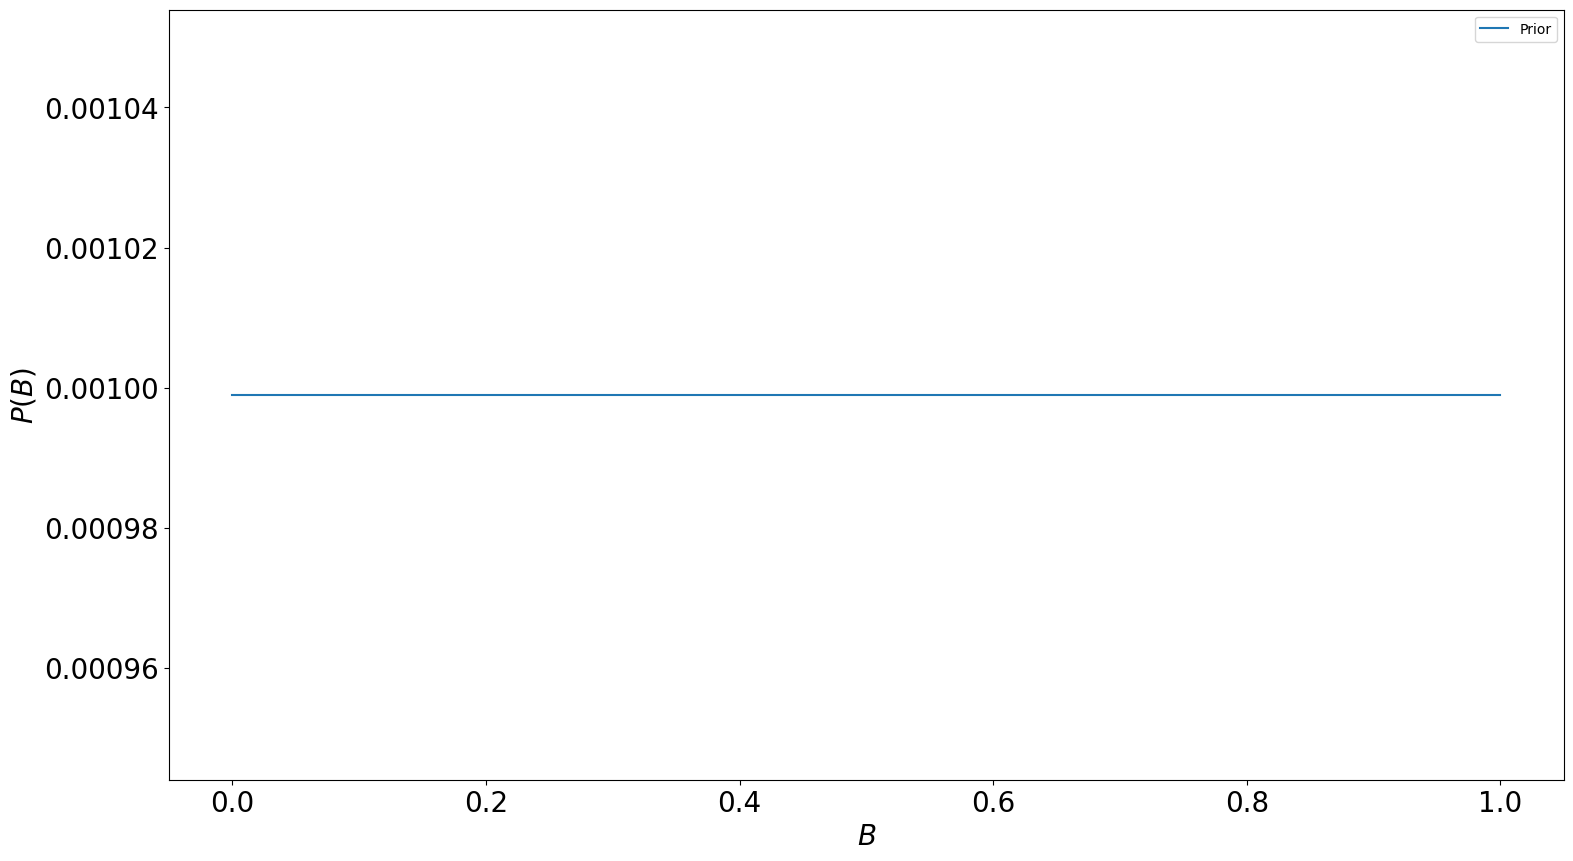

In [23]:
# Plot the histogram
plt.figure(
    num=1,
    figsize=(18,10),
    facecolor='white')

plt.plot(B, prior, label = 'Prior')


plt.xlabel(r'$B$', fontsize=20)
plt.ylabel(r'$P(B)$', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend()
plt.show()

## First coin flip

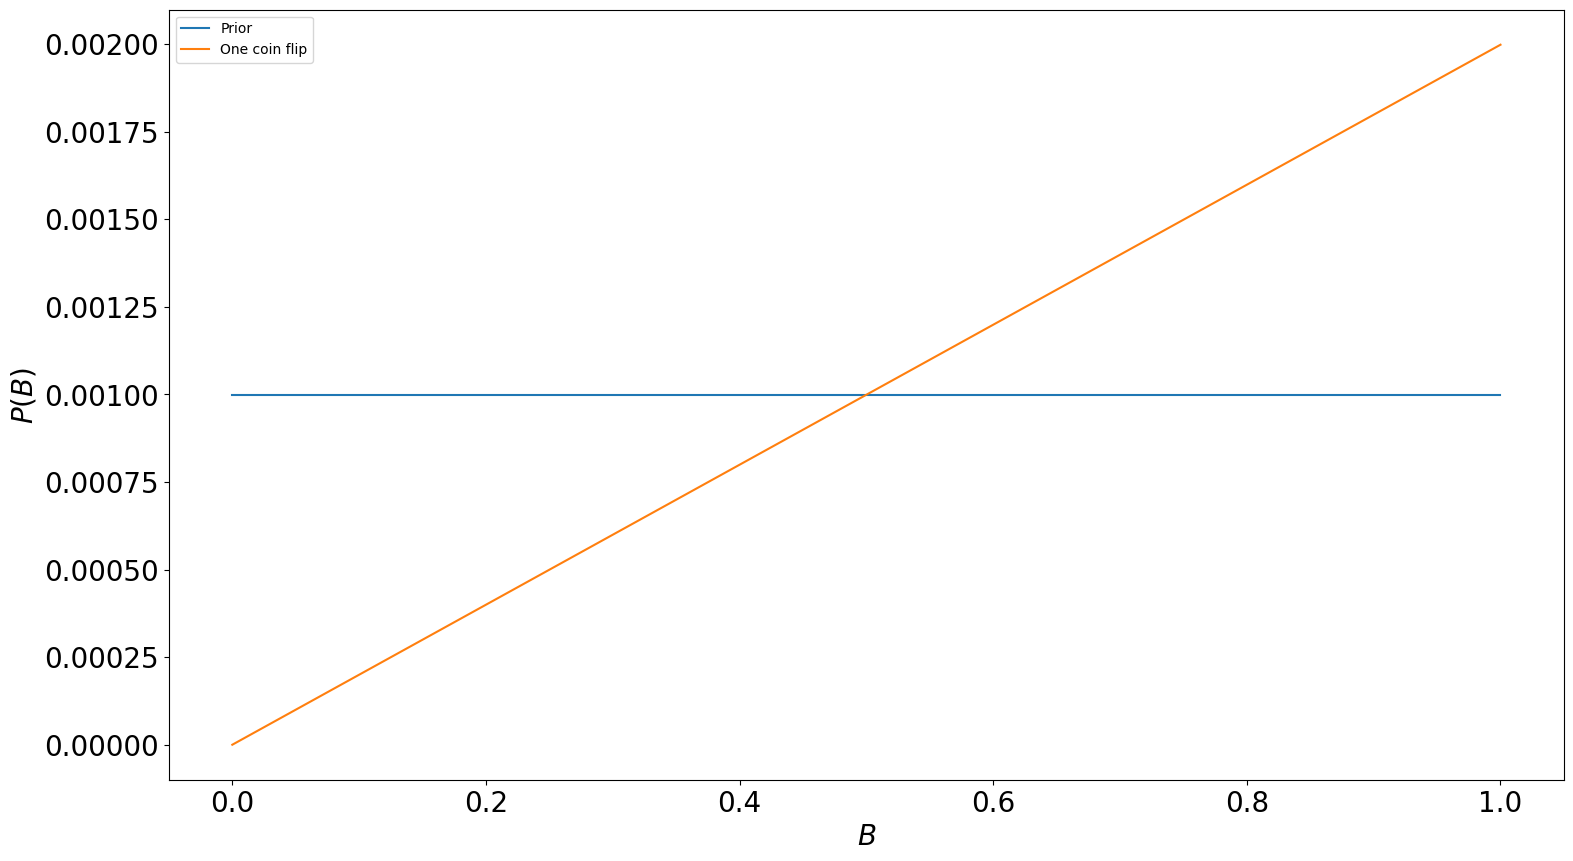

In [22]:
s1 = Coinflip(p)

posterior = B**s1 * (1-B)**(1-s1) * prior 

posterior1 = posterior / np.sum(posterior)



# Plot the histogram
plt.figure(
    num=1,
    figsize=(18,10),
    facecolor='white')

plt.plot(B, prior, label = 'Prior')
plt.plot(B, posterior1, label = 'One coin flip')


plt.xlabel(r'$B$', fontsize=20)
plt.ylabel(r'$P(B)$', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend()
plt.show()

## k coin flips

In [19]:
k = 51

pdf = np.zeros((k,n))
s = np.zeros(k)

pdf[0,:] = prior

for i in range(1,k):
    s[i] = Coinflip(p)
    pdf[i,:] = BayesianAnalysis(s[i], B, pdf[i-1,:])

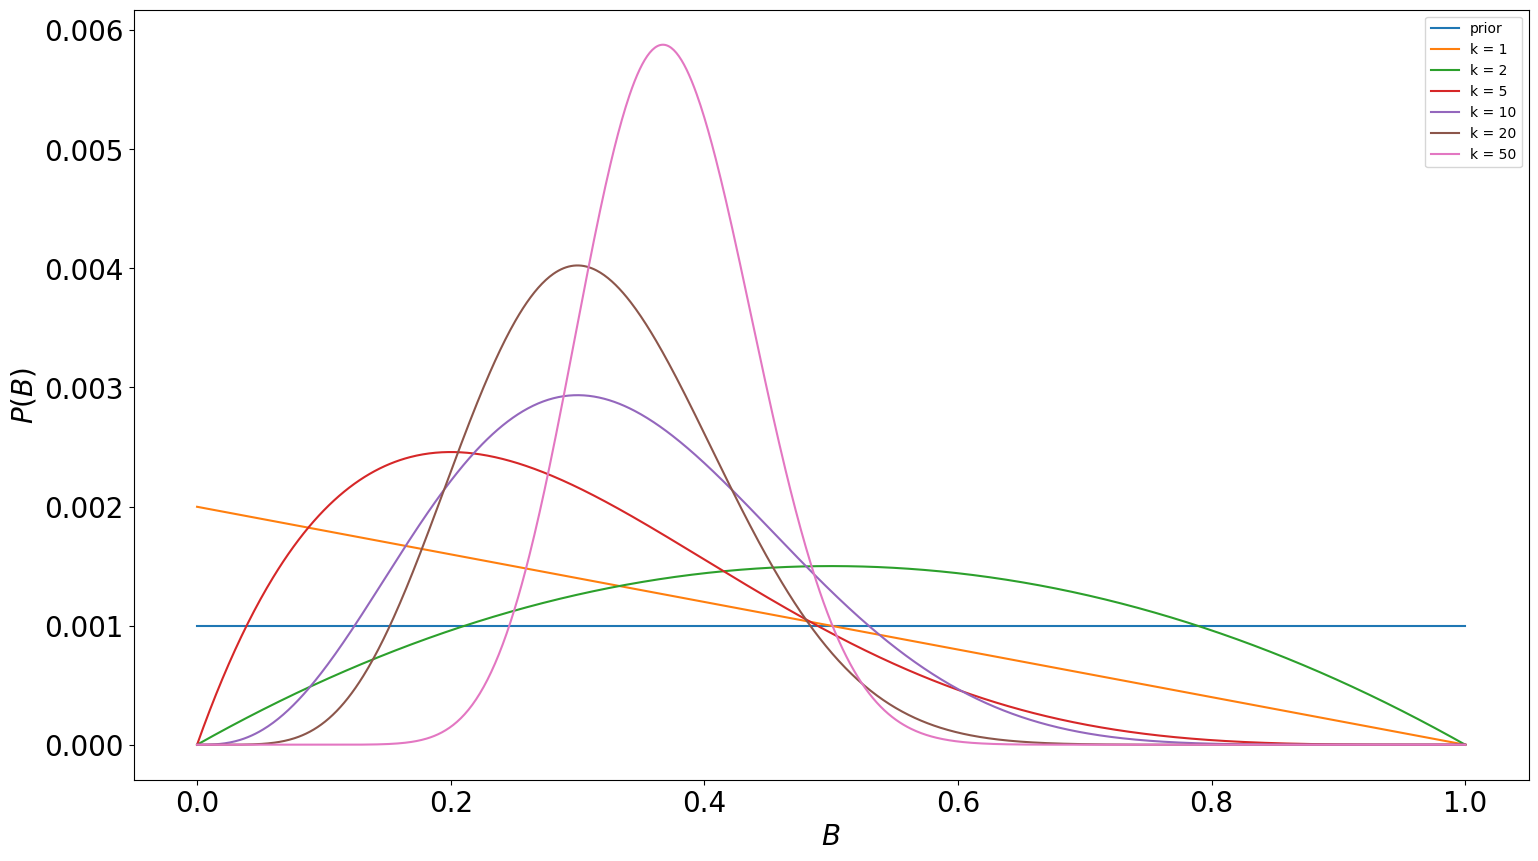

In [21]:
# Plot the histogram
plt.figure(
    num=1,
    figsize=(18,10),
    facecolor='white')


plt.plot(B, pdf[0,:], label = 'prior')
plt.plot(B, pdf[1,:], label = 'k = 1')
plt.plot(B, pdf[2,:], label = 'k = 2')
plt.plot(B, pdf[5,:], label = 'k = 5')
plt.plot(B, pdf[10,:], label = 'k = 10')
plt.plot(B, pdf[20,:], label = 'k = 20')
plt.plot(B, pdf[49,:], label = 'k = 50')


plt.xlabel(r'$B$', fontsize=20)
plt.ylabel(r'$P(B)$', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend()
plt.show()